In [116]:
import numpy as np
import pandas as pd 
import os
import cv2
import skimage.transform
import skimage.io
import matplotlib.pyplot as plt
from random import seed
from random import random
from statistics import mean
from shutil import move

data_rose = '/content/drive/MyDrive/dataset/rose'
data_tulip = '/content/drive/MyDrive/dataset/tulip'
data_daisy = '/content/drive/MyDrive/dataset/daisy'

def inputPicture(folder):
    images = []
    labels = []
    x = 0
    if folder == data_rose:
        for i in range(100):
            y = 0
            labels.append(y)
    elif folder == data_tulip:
        for i in range(100):
            y = 1
            labels.append(y)
    elif folder == data_daisy:
        for i in range(100):
            y = 2
            labels.append(y)
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (320,240), interpolation = cv2.INTER_AREA) 
        if img is not None:
            images.append(img)
        x += 1
        if x == 100: break
    
    return images, labels

image_rose, label_rose = inputPicture(data_rose)
image_tulip, label_tulip = inputPicture(data_tulip)
image_daisy, label_daisy = inputPicture(data_daisy)

images = image_rose + image_tulip + image_daisy
labels = label_rose + label_tulip + label_daisy

print(len(image))
print(len(labels))

300
300


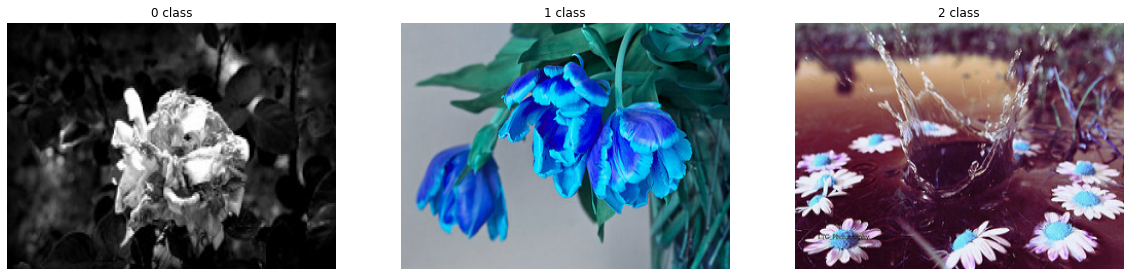

In [117]:
plt.figure(figsize = (20,20))
for i in range(3):
    img = image[100*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(str(target[100*i]) + " class")

In [118]:
np.array(image).shape

(300, 240, 320, 3)

In [119]:
def visualize_data(data):
  plt.figure(figsize = (30,30))
  for i in range(3):
    img = data[100*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(str(labels[100*i]))

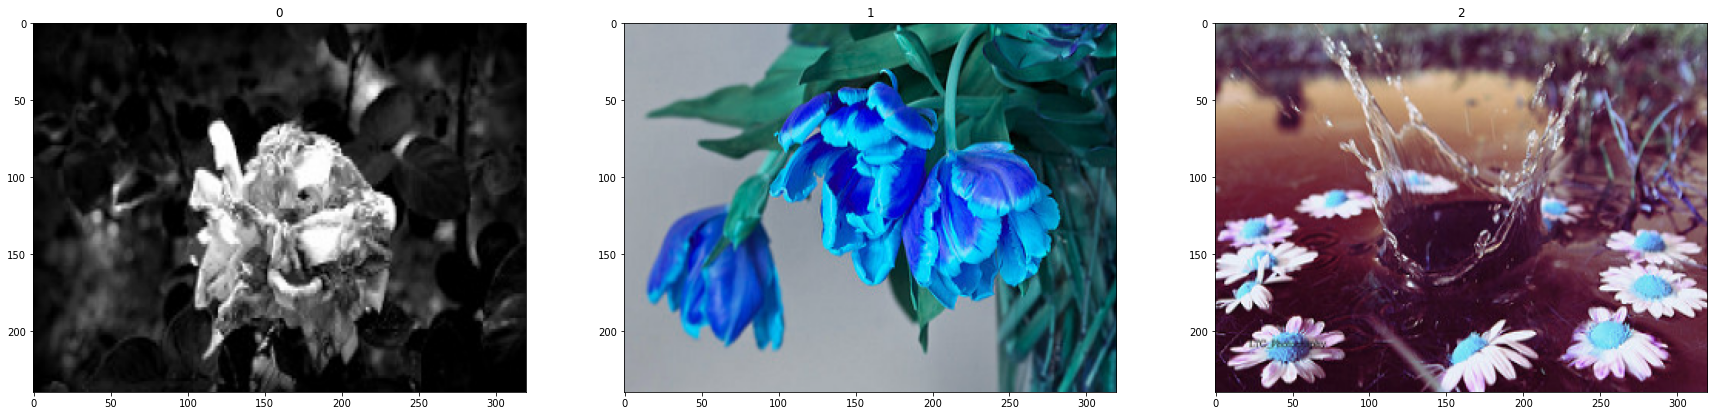

In [120]:
visualize_data(images)

In [121]:
from sklearn.model_selection import train_test_split as split
def train_test_split (X, Y, trainSize):
    X_train, X_test, Y_train, Y_test = split(X, Y, train_size = trainSize, stratify=Y)
    return X_train, X_test, Y_train, Y_test

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, 0.8)

In [123]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 0.8)

In [124]:
width = np.array(images).shape[1]
print(width)

240


In [125]:
height = np.array(image).shape[2]
print(height)

320


In [126]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [127]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes = 3)
Y_test = to_categorical(Y_test,num_classes = 3)
Y_val = to_categorical(Y_val,num_classes = 3)

In [128]:
alpha = 0.8
epoch = 50

In [129]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(width, height, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=alpha),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 238, 318, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 119, 159, 64)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 119, 159, 64)      256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 119, 159, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1210944)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               310001920 
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [130]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [133]:
validation_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [134]:
X_train = np.array(X_train)
X_val = np.array(X_val)

In [135]:
train_gen = train_datagen.flow(
    X_train,
    Y_train,
    batch_size=64
)

In [136]:
val_gen = validation_datagen.flow(
    X_val,
    Y_val,
    batch_size=64
)

In [137]:
history = model.fit(train_gen, epochs=epoch, verbose=1, validation_data=val_gen)

Epoch 1/50
3/3 [==============================] - 45s 13s/step - loss: 53.3459 - accuracy: 0.3438 - val_loss: 27346.1191 - val_accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 40s 14s/step - loss: 102.9797 - accuracy: 0.3594 - val_loss: 3596.0938 - val_accuracy: 0.4375
Epoch 3/50
3/3 [==============================] - 40s 13s/step - loss: 63.2533 - accuracy: 0.3438 - val_loss: 5946.7891 - val_accuracy: 0.2917
Epoch 4/50
3/3 [==============================] - 39s 13s/step - loss: 45.7608 - accuracy: 0.4688 - val_loss: 4705.9712 - val_accuracy: 0.3750
Epoch 5/50
3/3 [==============================] - 37s 12s/step - loss: 45.0673 - accuracy: 0.3958 - val_loss: 5785.4907 - val_accuracy: 0.2708
Epoch 6/50
3/3 [==============================] - 39s 13s/step - loss: 41.1731 - accuracy: 0.4896 - val_loss: 6421.1836 - val_accuracy: 0.1667
Epoch 7/50
3/3 [==============================] - 40s 13s/step - loss: 38.2632 - accuracy: 0.3854 - val_loss: 10294.6523 - val_accuracy: 0.2

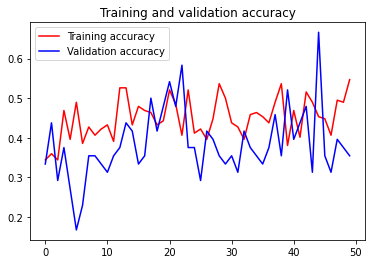

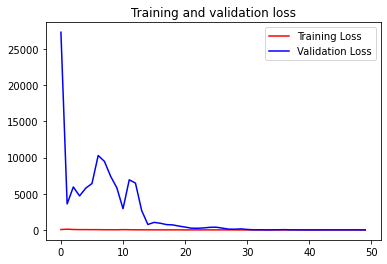

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()